In [1]:
import os
import numpy as np
import sys
sys.path.append('../../scripts/')
from scipy.interpolate import interp1d

import matplotlib.pyplot as plt
import mpl_stylesheet
mpl_stylesheet.banskt_presentation(fontfamily = 'system', colors = 'kelly')

In [87]:
def plot_components_old(ax, data, xmax, xmin, nbin, ninterp, legend, interp = True, ymax = 0.0):
    bins = np.linspace(xmin, xmax, nbin)
    xbin = [(bins[i] + bins[i+1]) / 2 for i in range(bins.shape[0] - 1)] # centers of the bins
    x = np.linspace(xbin[0], xbin[-1], ninterp)
    nrow = data.shape[0]
    ncol = data.shape[1]
    ymaxcal = 0
    for i in range(nrow):
        yhist, _ = np.histogram(data[i, :], bins = bins)
        yfreq = yhist / ncol
        if interp:
            fy = interp1d(xbin, yfreq, kind='cubic')
            y = fy(x)
            ax.plot(x, y, alpha = 0.3)
            ymaxnew = np.max(y)
        else:
            ax.plot(xbin, yfreq, alpha = 0.3)
            ymaxnew = np.max(yfreq)
        if ymaxnew > ymaxcal:
            ymaxcal = ymaxnew
    if ymax == 0:
        ymaxset = round(ymaxcal + 0.05, 1)
    else:
        ymaxset = ymax
    ax.set_ylim([0, ymaxset])
    ax.text(0.1, 0.85, legend, horizontalalignment='left', transform=ax.transAxes)
    return ymaxset

def plot_components_old(ax, data, xmax, xmin, nbin, ninterp, legend, interp = True, ymax = 0.0):
    bins = np.linspace(xmin, xmax, nbin)
    xbin = [(bins[i] + bins[i+1]) / 2 for i in range(bins.shape[0] - 1)] # centers of the bins
    x = np.linspace(xbin[0], xbin[-1], ninterp)
    ncol = data.shape[0]
    ymaxcal = 0
    yhist, _ = np.histogram(data, bins = bins)
    yfreq = yhist / ncol
    if interp:
        fy = interp1d(xbin, yfreq, kind='cubic')
        y = fy(x)
        ax.plot(x, y, alpha = 0.3)
        ymaxnew = np.max(y)
    else:
        ax.plot(xbin, yfreq, alpha = 0.3)
        ymaxnew = np.max(yfreq)
    if ymaxnew > ymaxcal:
        ymaxcal = ymaxnew
    if ymax == 0:
        ymaxset = round(ymaxcal + 0.05, 1)
    else:
        ymaxset = ymax
    ax.set_ylim([0, ymaxset])
    ax.text(0.1, 0.85, legend, horizontalalignment='left', transform=ax.transAxes)
    return ymaxset

def plot_components(ax, data, xmax, xmin, nbin, ninterp, legend, interp = True, ymax = 0.0):
    #ax.hist(data, bins = nbin, density = True, alpha = 0.3)
    bins = np.linspace(xmin, xmax, nbin)
    xbin = [(bins[i] + bins[i+1]) / 2 for i in range(bins.shape[0] - 1)] # centers of the bins
    x = np.linspace(xbin[0], xbin[-1], ninterp)
    ax.hist(data, bins = bins, alpha = 0.3)

    ymaxcal = 0
    #yhist, _ = np.histogram(data, bins = bins, density = True)
    yhist, _ = np.histogram(data, bins = bins)
    #yfreq = yhist / data.shape[0]
    yfreq = yhist
    if interp:
        fy = interp1d(xbin, yfreq, kind='cubic')
        y = fy(x)
        ax.plot(x, y, alpha = 1.0)
        ymaxnew = np.max(y)
    else:
        ax.plot(xbin, yfreq, alpha = 0.3)
        ymaxnew = np.max(yfreq)
    if ymaxnew > ymaxcal:
        ymaxcal = ymaxnew
    if ymax == 0:
        ymaxset = round(ymaxcal + 0.05, 1)
    else:
        ymaxset = ymax
    ax.set_ylim([0, ymaxset + 10])
    #ax.set_xlim([xmin, xmax])
    ax.text(0.1, 0.85, legend, horizontalalignment='left', transform=ax.transAxes)
    return ymaxset
    

def read_expression(filename):
    # returns G x N gene expression
    #         list of N donor ids
    #         list of G gene names
    gx = list()
    genes = list()
    with open(filename, 'r') as infile:
        header = next(infile)
        for line in infile:
            linesplit = line.strip().split()
            thisgx = np.array([float(x) for x in linesplit[1:]])
            gx.append(thisgx)
            genes.append(linesplit[0])
    gx = np.array(gx)
    donors = header.strip().split()[1:]
    return gx, donors, genes

In [3]:
srcdir = '/scratch/sbanerj/trans-eqtl/simulation/16151_450_10_800_30_150_100_0.01_0.5_0.0_1.0_0.6_4.0_0.1_20_0.02/sim000/input'

In [4]:
GX, _, _ = read_expression(os.path.join(srcdir, 'expression.txt'))

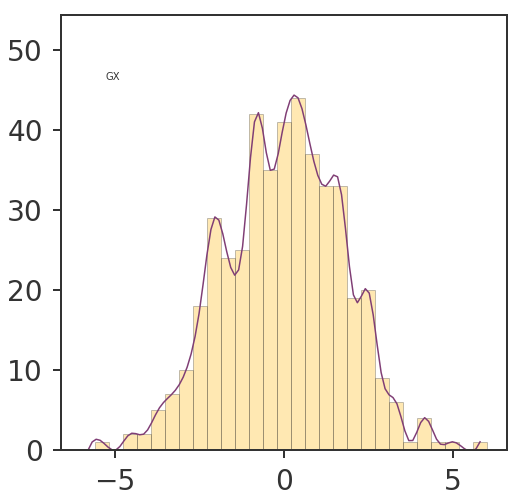

In [95]:
fig = plt.figure(figsize = (8, 8))
ax1 = fig.add_subplot(111)

nbin = 30
ninterp = 100
ngene_plot = 12
xmax = int(max(abs(np.min(GX[ngene_plot, :])), abs(np.max(GX[ngene_plot, :]))) + 0.5)
xmin = -xmax

ymax = plot_components(ax1, GX[ngene_plot, :], xmax, xmin, nbin, ninterp, 'GX', interp = True)